In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-processing - Load, Cleaning Data, and Encoding

Missing Values:
 Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Suicide attempt                               0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_11500\329605069.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_11500\329605069.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_11500\329605069.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_11500\329605069.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `leg

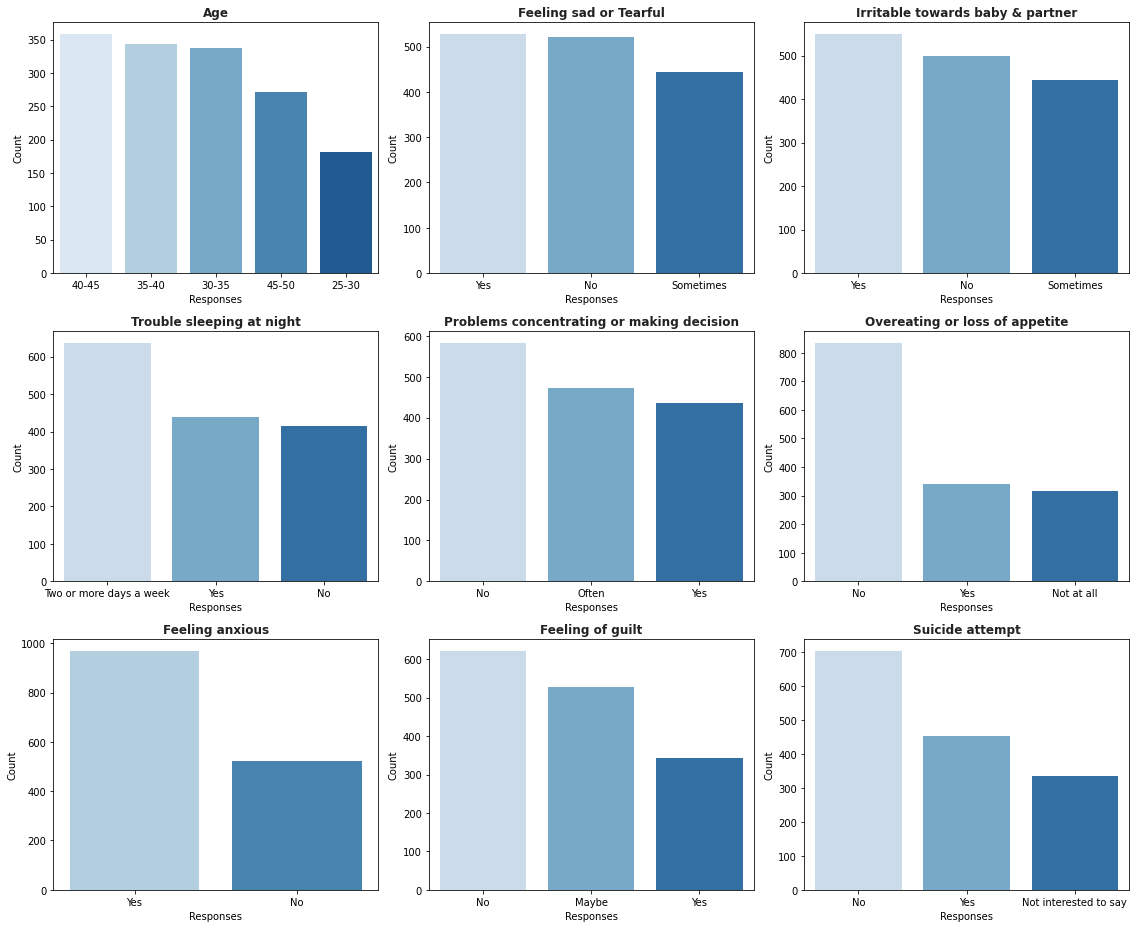

[2. 3. 1. 4. 0.]


C:\Users\HP\AppData\Local\Temp\ipykernel_11500\329605069.py:58: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(encoding_map, inplace=True)


In [ ]:
#Load Dataset
df = pd.read_csv('post natal data.csv')


print("Missing Values:\n", df.isnull().sum())

df = df.dropna()

response_counts = {col: df[col].value_counts() for col in df.columns}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 13))
axes = axes.flatten()

def get_blue_gradient(n):
    return sns.color_palette("Blues", n)

# Plot setiap kolom pada subplot yang berbeda
for i, col in enumerate(df.columns):
    values = response_counts[col].values
    gradient_colors = get_blue_gradient(len(values))
    
    sns.barplot(
        x=response_counts[col].index,
        y=values,
        ax=axes[i],
        palette=gradient_colors
    )
    
    axes[i].set_title(col, fontsize=12, fontweight='bold', color='#222222')
    axes[i].set_xlabel("Responses", fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='x', rotation=0)
    
plt.tight_layout()
plt.show()


from sklearn.preprocessing import OrdinalEncoder

age_order = [['25-30', '30-35', '35-40', '40-45', '45-50']]
ordinal_encoder = OrdinalEncoder(categories=age_order)
df['Age'] = ordinal_encoder.fit_transform(df[['Age']])
print(df['Age'].unique())
    
encoding_map = {
    'Yes': 1, 'No': 0, 
    'Sometimes': 2, 'Often': 2, 
    'Not at all': 2, 'Maybe': 2, 
    'Two or more days a week': 2, 
    'Not interested to say': 2
}
df.replace(encoding_map, inplace=True)





In [3]:
df.iloc[370:390]

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Suicide attempt
374,2.0,1,0,2,0,0,1,2,0
375,2.0,2,0,0,2,0,1,2,0
376,2.0,0,2,2,0,0,0,1,2
377,3.0,0,2,1,2,0,1,0,0
378,3.0,2,2,2,0,0,0,2,0
379,3.0,0,1,2,0,0,1,0,1
380,4.0,0,0,1,2,0,1,0,1
381,2.0,1,2,2,1,0,0,1,2
382,2.0,1,2,1,1,1,0,2,1
383,1.0,2,1,0,1,0,1,0,1


# Pre-processing Split Data

In [4]:
X = df.drop(columns=['Feeling anxious'])  # Fitur
y = df['Feeling anxious']  # Target Label

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data 80:20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 Cek Hasil Pembagian Data
print("Data Training:", X_train.shape)  
print("Data Testing:", X_test.shape)     


Data Training: (1192, 8)
Data Testing: (299, 8)


# Modelling dan Training

In [5]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y_train)



SVC(C=10)

# Confusion Matrix with Data Test

In [6]:

y_test_pred = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)

from sklearn.metrics import classification_report
test_report = classification_report(y_test, y_test_pred)


from sklearn.metrics import confusion_matrix
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Akurasi Test: {test_accuracy:.3f}")
print("\nLaporan Klasifikasi (Testing Set):\n", test_report)
print("\nConfusion Matrix (Testing Set):\n", test_conf_matrix)


Akurasi Test: 0.973

Laporan Klasifikasi (Testing Set):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        95
           1       0.99      0.98      0.98       204

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299


Confusion Matrix (Testing Set):
 [[ 92   3]
 [  5 199]]


# Confusion Matrix HeatMap

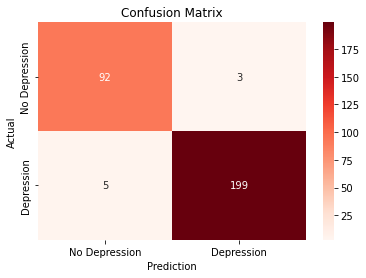

In [ ]:
y_val_pred = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

# Visualisasi menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# K-Fold

In [8]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=kfold)

for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: Akurasi = {score:.2f}")
print(f"Akurasi K-Fold CV: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Fold 1: Akurasi = 0.97
Fold 2: Akurasi = 0.98
Fold 3: Akurasi = 0.95
Fold 4: Akurasi = 0.95
Fold 5: Akurasi = 0.97
Akurasi K-Fold CV: 0.96 ± 0.01


# Convert to Plk

In [ ]:
import pickle

with open('svm_model_antenatal', 'wb') as file:
    pickle.dump(svm_model, file)